In [939]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Загрузка данных

In [940]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Data is loaded!")

Data is loaded!


In [941]:
print(f"Train:\t{train.shape[0]}\t sales and {train.shape[1]} features")
print(f'Test:\t{test.shape[0]}\t sales and {test.shape[1]} features')

Train:	10000	 sales and 20 features
Test:	5000	 sales and 19 features


In [942]:
train = train.set_index('Id')
test = test.set_index('Id')

In [943]:
train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [944]:
test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


## Обзор данных

In [945]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [946]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [947]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


In [948]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Social_1,5000.0,24.933800,17.532202,0.000000,6.000000,25.000000,36.000000,74.000000


In [949]:
train['DistrictId'] = train['DistrictId'].astype(str)
test['DistrictId'] = test['DistrictId'].astype(str)

In [950]:
train['Rooms'] = train['Rooms'].astype(int)
test['Rooms'] = test['Rooms'].astype(int)

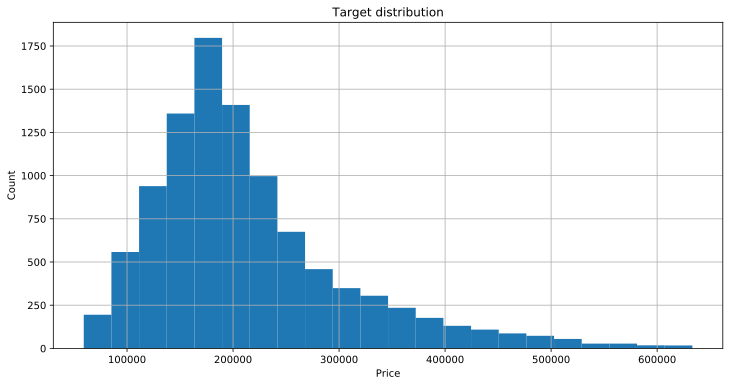

In [951]:
#Целевая переменная
plt.figure(figsize = (12, 6))

train['Price'].hist(bins=22)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [952]:
#Категориальные данные
train.describe(include=['O']).T

,count,unique,top,freq
DistrictId,10000,205,27,851
Ecology_2,10000,2,B,9903
Ecology_3,10000,2,B,9725
Shops_2,10000,2,B,9175


In [953]:
test.describe(include=['O']).T

,count,unique,top,freq
DistrictId,5000,201,27,391
Ecology_2,5000,2,B,4952
Ecology_3,5000,2,B,4851
Shops_2,5000,2,B,4588


## Изменение данных, обработка выбросов

In [954]:
# Изменяем данные о комнатах с большим количеством комнат и маленькой площадью.¶
# Также меняем количество квартир, у которых в колонке Rooms стоит 0.
# Количество комнат заменяем в прямой зависимости от площади.
train.loc[train['Rooms'] > 6, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
5927,57,10,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
8491,1,19,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
14865,9,10,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [955]:
train.loc[train['Rooms'] < 1, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
12638,27,0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
7917,27,0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7317,27,0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
770,28,0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
456,6,0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
3224,27,0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
3159,88,0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
9443,27,0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [956]:
train.loc[train['Rooms'].isin([0, 10, 19]), 'Rooms'] = train['Rooms'].median()

In [957]:
train.Rooms.describe()

count    10000.000000
mean         1.888800
std          0.812096
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: Rooms, dtype: float64

In [958]:
test.loc[test['Rooms'] > 6, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
1435,111,17,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [959]:
test.loc[test['Rooms'].isin([0, 17]), 'Rooms'] = test['Rooms'].median()

In [960]:
test.Rooms.describe()

count    5000.00000
mean        1.90780
std         0.81008
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         6.00000
Name: Rooms, dtype: float64

In [961]:
#Общая площадь, жилая площадь, площадь кухни
train.loc[train['Square'] < 10, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
3224,27,2.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


In [962]:
train.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [963]:
train.loc[train['Square'] < 10, 'Square'] = train['Square'].median()

In [964]:
test.loc[test['Square']< 10, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [965]:
test.loc[test['Square'] < 10, 'Square'] = test['Square'].median()

In [966]:
#Lifesquare не может быть больше Square, а так же прямо пропорционально зависит от количества комнат.
train.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [967]:
train.loc[train['LifeSquare'].isnull(), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
2996,1,2.0,64.994245,NaN,1.0,9,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,200332.511658
15623,23,2.0,55.620092,NaN,0.0,2,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,115797.553006


In [968]:
train.loc[train['LifeSquare'] < 10, :] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,27,2.0,58.943039,3.319486,1.0,11,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B,142789.948977
2040,62,1.0,122.438148,5.751401,1.0,2,3.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,224900.897679
13630,24,3.0,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.0,2,3,B,611250.912034


In [969]:
train.loc[(train['LifeSquare'].isnull()) & (train['Square'] > 60), 'LifeSquare'] = train['LifeSquare'].median()

In [970]:
train.loc[(train['LifeSquare'].isnull()) & (train['Square'] < 60), 'LifeSquare'] = train['LifeSquare'].quantile(.25)

In [971]:
train.loc[train['LifeSquare'] <= 10, 'LifeSquare'] = train['LifeSquare'].quantile(.25)

In [972]:
# Жилая площадь привышающая общую площадь
train.loc[train['LifeSquare'] > train['Square'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047


In [973]:
train.loc[(train['LifeSquare'] > train['Square']) & (train['Square'] > 100), 
          'LifeSquare'] = train['LifeSquare'].quantile(.75)

In [974]:
train.loc[(train['LifeSquare'] > train['Square']) & (train['Square'] < 100) & (train['Square'] > 50), 
          'LifeSquare'] = train['LifeSquare'].median()

In [975]:
train.loc[(train['LifeSquare'] > train['Square']) & (train['Square'] < 50), 
          'LifeSquare'] = train['LifeSquare'].quantile(.25)

In [976]:
train.LifeSquare.describe()

count    10000.000000
mean        33.331342
std         15.043789
min         10.523868
25%         23.631679
50%         32.002658
75%         38.053162
max        638.163193
Name: LifeSquare, dtype: float64

In [977]:
test.loc[(test['LifeSquare'].isnull()) & (test['Square'] > 60), 'LifeSquare'] = test['LifeSquare'].median()
test.loc[(test['LifeSquare'].isnull()) & (test['Square'] < 60), 'LifeSquare'] = test['LifeSquare'].quantile(.25)
test.loc[test['LifeSquare'] <= 10, 'LifeSquare'] = test['LifeSquare'].quantile(.25)

In [978]:
test.loc[(test['LifeSquare'] > test['Square']) & (test['Square'] > 100), 'LifeSquare'] = train['LifeSquare'].quantile(.75)
test.loc[(test['LifeSquare'] > test['Square']) & (test['Square'] < 100) & (test['Square'] > 50), 
                                                    'LifeSquare'] = test['LifeSquare'].median()
test.loc[(test['LifeSquare'] > test['Square']) & (test['Square'] < 50), 'LifeSquare'] = test['LifeSquare'].quantile(.25)

In [979]:
test.LifeSquare.describe()

count    5000.000000
mean       33.424418
std        13.204222
min        10.692499
25%        23.941429
50%        32.286545
75%        38.053162
max       136.921090
Name: LifeSquare, dtype: float64

In [980]:
train.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [981]:
train.loc[train['KitchenSquare'] > train['Square'], : ] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [982]:
train.loc[train['KitchenSquare'] > train['Square'], 'KitchenSquare'] = train['KitchenSquare'].median()

In [983]:
train.loc[train['Ecology_2'] == 6, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


In [984]:
train.loc[train['KitchenSquare'] > train['LifeSquare'], : ] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,B,B,5,1564,0,540.0,0,0,B,146950.912410
2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,NaN,0,0,B,189244.249909
4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,4129.0,0,3,B,261125.669724
15691,62,1.0,41.735073,12.423180,14.0,3,15.0,2010,0.072158,B,B,2,629,1,NaN,0,0,A,80331.107871
12390,72,3.0,97.490674,32.609259,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
16781,27,1.0,36.138409,23.631679,36.0,19,19.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,131742.536281
6508,23,2.0,67.146049,33.959154,63.0,5,17.0,2019,0.034656,B,B,0,168,0,NaN,0,0,B,193130.585871
15466,88,1.0,42.357487,23.631679,41.0,10,19.0,2016,0.127376,B,B,43,8429,3,NaN,3,9,B,194525.103119


In [985]:
train.loc[train['KitchenSquare'] > train['LifeSquare'], 'KitchenSquare'] = train['KitchenSquare'].quantile(.75)

In [986]:
train.loc[(train['KitchenSquare'] < 5) & (train['Square'] > 100), 'KitchenSquare'] = train['KitchenSquare'].quantile(.75)
train.loc[(train['KitchenSquare'] < 5) & (train['Square'] < 100), 'KitchenSquare'] = train['KitchenSquare'].median()

In [987]:
test.KitchenSquare.describe()

count    5000.000000
mean        5.976800
std         9.950018
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       620.000000
Name: KitchenSquare, dtype: float64

In [988]:
test.loc[test['KitchenSquare'] > test['Square'], 'KitchenSquare' ] = test['KitchenSquare'].median()
test.loc[test['KitchenSquare'] > test['LifeSquare'], 'KitchenSquare'] = test['KitchenSquare'].quantile(.75)
test.loc[(test['KitchenSquare'] < 5) & (test['Square'] > 100), 'KitchenSquare'] = test['KitchenSquare'].quantile(.75)
test.loc[(test['KitchenSquare'] < 5) & (test['Square'] < 100), 'KitchenSquare'] = test['KitchenSquare'].median()

In [989]:
test.loc[test['Ecology_2'] == 6, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [990]:
#Floor, HouseFloor
train.Floor.describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

In [991]:
train.HouseFloor.describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [992]:
train.loc[train['HouseFloor'] < train['Floor'], 
          'HouseFloor' ] = train.loc[train['HouseFloor'] < train['Floor'], 'HouseFloor' ] +  train['HouseFloor'].median()

In [993]:
#Выше 80 этажей как правило отдельные здания в крупных мегаполисах. Не характерная этажность для рассматриваемого района.
train.loc[train['HouseFloor'] > 80, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10806,5,1.0,51.944587,48.709601,6.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
9300,74,2.0,71.747869,32.609259,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
78,30,2.0,65.773749,32.609259,6.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [994]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor' ] = train['HouseFloor'].median()

In [995]:
test.Floor.describe()

count    5000.000000
mean        8.632000
std         5.483228
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        78.000000
Name: Floor, dtype: float64

In [996]:
#HouseYear
train.loc[train['HouseYear'] > 2020, :] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [997]:
def house_year(df):
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
    return df

In [998]:
house_year(train).head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
11993,74,2.0,80.312926,32.781260,6.0,14,13.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
5172,1,2.0,64.511437,32.781260,6.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999


In [999]:
house_year(test).head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
7633,53,1.0,40.675627,23.941429,6.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
13329,23,2.0,68.099538,64.843025,6.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B


In [1000]:
test.loc[test['HouseYear'] > 2020, :] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [1001]:
#Пропуски
train.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [1002]:
train['Healthcare_1'].head()

Id
14038       NaN
15053     240.0
4765      229.0
5809     1084.0
10783    2078.0
Name: Healthcare_1, dtype: float64

In [1003]:
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].median()

In [1004]:
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = test['Healthcare_1'].median()

#### Новые признаки

In [1005]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
train['Shops_2_bin'] = train['Shops_2'].replace({'A':0, 'B':1})

In [1006]:
pd.get_dummies(train['Ecology_2']).head()

,A,B
Id,,
14038,0,1
15053,0,1
4765,0,1
5809,0,1
10783,0,1


In [1007]:
test['Ecology_2_bin'] = test['Ecology_2'].replace({'A':0, 'B':1})
test['Ecology_3_bin'] = test['Ecology_3'].replace({'A':0, 'B':1})
test['Shops_2_bin'] = test['Shops_2'].replace({'A':0, 'B':1})

In [1008]:
pd.get_dummies(test['Ecology_2']).head()

,A,B
Id,,
725,0,1
15856,0,1
5480,0,1
15664,0,1
14275,0,1


In [1009]:
test.loc[test['Ecology_2_bin'] == 6, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
Id,,,,,,,,,,,,,,,,,,,,,


### Отбор признаков

In [1010]:
train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

In [1011]:
med_price_by_district = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [1012]:
train = train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').set_index(train.index)

In [1013]:
train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,5,900.0,0,11,B,184966.930730,1,1,1,207786.135836
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,1,240.0,1,16,B,300009.450063,1,1,1,300009.450063
4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,B,...,0,229.0,1,3,B,220925.908524,1,1,1,263206.223152
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,3,1084.0,0,5,B,175616.227217,1,1,1,166809.665642
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,1,2078.0,2,4,B,150226.531644,1,1,1,158539.052715


In [1014]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DistrictId          10000 non-null  object 
 1   Rooms               10000 non-null  float64
 2   Square              10000 non-null  float64
 3   LifeSquare          10000 non-null  float64
 4   KitchenSquare       10000 non-null  float64
 5   Floor               10000 non-null  int64  
 6   HouseFloor          10000 non-null  float64
 7   HouseYear           10000 non-null  int64  
 8   Ecology_1           10000 non-null  float64
 9   Ecology_2           10000 non-null  object 
 10  Ecology_3           10000 non-null  object 
 11  Social_1            10000 non-null  int64  
 12  Social_2            10000 non-null  int64  
 13  Social_3            10000 non-null  int64  
 14  Healthcare_1        10000 non-null  float64
 15  Helthcare_2         10000 non-null  int64  
 16  S

In [1015]:
test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,11,2748,1,900.0,0,0,B,1,1,1
15856,74,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,B,...,6,1437,3,900.0,0,2,B,1,1,1
5480,190,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000,B,...,30,7538,87,4702.0,5,5,B,1,1,1
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,...,23,4583,3,900.0,3,3,B,1,1,1
14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,B,...,2,629,1,900.0,0,0,A,1,1,0


In [1016]:
test = test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').set_index(test.index)

In [1017]:
test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,...,2748,1,900.0,0,0,B,1,1,1,166809.665642
15856,74,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,B,...,1437,3,900.0,0,2,B,1,1,1,243031.695525
5480,190,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000,B,...,7538,87,4702.0,5,5,B,1,1,1,NaN
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,...,4583,3,900.0,3,3,B,1,1,1,222227.584211
14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,B,...,629,1,900.0,0,0,A,1,1,0,118327.090620


In [1018]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DistrictId          5000 non-null   object 
 1   Rooms               5000 non-null   float64
 2   Square              5000 non-null   float64
 3   LifeSquare          5000 non-null   float64
 4   KitchenSquare       5000 non-null   float64
 5   Floor               5000 non-null   int64  
 6   HouseFloor          5000 non-null   float64
 7   HouseYear           5000 non-null   int64  
 8   Ecology_1           5000 non-null   float64
 9   Ecology_2           5000 non-null   object 
 10  Ecology_3           5000 non-null   object 
 11  Social_1            5000 non-null   int64  
 12  Social_2            5000 non-null   int64  
 13  Social_3            5000 non-null   int64  
 14  Healthcare_1        5000 non-null   float64
 15  Helthcare_2         5000 non-null   int64  
 16  Sho

In [1019]:
test.loc[test['MedPriceByDistrict'].isnull(), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
5480,190,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000e+00,B,...,7538,87,4702.0,5,5,B,1,1,1,NaN
15748,212,2.0,75.655182,36.877626,15.0,2,7.0,1929,0.000000e+00,B,...,1423,37,562.0,1,8,B,1,1,1,NaN
3764,193,4.0,97.931642,72.386905,8.0,5,5.0,1957,3.198094e-01,B,...,4756,16,2857.0,5,8,B,1,1,1,NaN
10816,51,3.0,97.889332,58.640564,12.0,4,5.0,1929,1.501689e-02,B,...,3079,59,2890.0,0,8,B,1,1,1,NaN
11407,79,4.0,37.920348,21.357487,6.0,6,17.0,2014,3.074667e-01,B,...,5048,9,325.0,2,5,B,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,52,4.0,104.638510,62.185444,10.0,4,22.0,2005,3.711490e-01,B,...,7065,1,750.0,2,5,B,1,1,1,NaN
429,92,4.0,107.747554,60.377351,13.0,10,17.0,2008,4.605564e-01,B,...,4386,14,900.0,1,5,B,1,1,1,NaN
13426,209,3.0,57.320443,43.187837,6.0,4,5.0,1967,4.024276e-02,B,...,3478,11,2729.0,3,1,B,1,1,1,NaN


In [1020]:
test.loc[test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = test['MedPriceByDistrict'].median()

In [1021]:
med_price_by_year = train.groupby(['DistrictId', 'HouseYear'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByYear'})

med_price_by_year.head()

,DistrictId,HouseYear,MedPriceByYear
0,0,1959,221660.251771
1,0,1960,339228.823764
2,0,1961,115835.592141
3,0,1962,139395.378454
4,0,1963,147258.736617


In [1022]:
train = train.merge(med_price_by_year, on=['DistrictId', 'HouseYear'], how='left').set_index(train.index)
test = test.merge(med_price_by_year, on=['DistrictId', 'HouseYear'], how='left').set_index(test.index)

In [1045]:
test.loc[test['MedPriceByYear'].isnull(), 'MedPriceByYear'] = test['MedPriceByYear'].median()

In [1023]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin', 'MedPriceByDistrict', 'MedPriceByYear']

target_name = 'Price'

### Разбиение train и value

In [1024]:
train.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2', 'DistrictId'], inplace=True)


In [1025]:
X = train[feature_names]
y = train[target_name]

In [1026]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [1027]:
X_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,MedPriceByDistrict,MedPriceByYear
Id,,,,,,,,,,,,,,,,,,,
6225,1.0,39.837741,23.281368,7.0,13,17.0,2010,0.007659,1,1,35,7077,56,2301.0,3,19,1,254129.932557,269691.729503
12927,2.0,17.414181,23.631679,6.0,4,20.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,178912.369081,157787.330989
13125,1.0,44.846563,21.589865,8.0,3,14.0,2004,0.000000,1,1,36,6714,2,2672.0,0,2,1,181165.005575,204373.023973
12282,2.0,52.449858,27.145808,7.0,3,5.0,1953,0.169091,1,1,19,3856,10,900.0,2,5,1,232216.752018,307509.254721
1214,3.0,65.521543,39.973740,8.0,5,9.0,1976,0.169091,1,1,19,3856,10,900.0,2,5,1,354709.711169,269623.080193


In [1028]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7000, 19), (3000, 19), (7000,), (3000,))

### Построение модели

#### GridSearchCV

In [1029]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': range(13, 15, 1),
    'max_features': range(2, 4, 1),
    'min_samples_leaf': range(2, 3, 1),
    'min_samples_split': range(2, 4, 2),
    'n_estimators': range(80, 90, 5)
}

In [1030]:
rf_model=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, scoring='r2')

In [1031]:
grid_search.fit(train.loc[:, feature_names], train['Price'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [1032]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 14,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [1033]:
grid_pred = grid_search.predict(X_train)
r2(y_train, grid_pred)

0.9553431910650456

In [1034]:
grid_pred_val = grid_search.predict(X_val)
r2(y_val, grid_pred_val)

0.9533483963849919

In [1035]:
grid_pred

array([260851.54829242, 158797.37840823, 192709.53043921, ...,
       249886.81386095, 344322.34384363, 145787.35055455])

In [1036]:
grid_pred_val

array([ 99615.64685736, 491553.38695818, 128890.02776015, ...,
       138384.45024613, 132509.48688383, 180163.34834697])

### RandomForestRegressor¶

In [1037]:
rf_model = grid_search.best_estimator_
rf_model

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [1038]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [1039]:
rf_pred = rf_model.predict(X_train)
r2(y_train, rf_pred)

0.9615339684000851

In [1040]:
rf_pred_val = rf_model.predict(X_val)
r2(y_val, rf_pred_val)

0.8316539433475588

In [1041]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceByYear,0.273305
17,MedPriceByDistrict,0.195228
1,Square,0.121742
0,Rooms,0.098353
2,LifeSquare,0.075181
10,Social_1,0.036840
11,Social_2,0.036406
3,KitchenSquare,0.030371
12,Social_3,0.027870
6,HouseYear,0.021499


### Применение на тестовых данных

In [1042]:
test.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2', 'DistrictId'], inplace=True)

In [1046]:
pred_test = rf_model.predict(test)
pred_test

array([196925.49637644, 205438.44879034, 178685.33903249, ...,
       301734.12110752, 187013.19807536, 191532.50396906])

In [1047]:
test['Price'] = pred_test
test.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,MedPriceByYear,Price
Id,,,,,,,,,,,,,,,,,,,,
725,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,900.0,0,0,1,1,1,166809.665642,265002.283090,196925.496376
15856,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,6,1437,3,900.0,0,2,1,1,1,243031.695525,195831.983247,205438.448790
5480,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,1,1,1,197049.231078,184778.703218,178685.339032
15664,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,900.0,3,3,1,1,1,222227.584211,189627.241190,243599.116864
14275,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,2,629,1,900.0,0,0,1,1,0,118327.090620,145700.620170,130884.583293


In [1048]:
test.shape

(5000, 20)

In [1049]:
test_data = pd.DataFrame(data = {'Id': test.index[0:], 'Price': pred_test})
test_data.to_csv('AVChernova_predictions.csv', index=False, sep=',')

In [1050]:
test.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,MedPriceByYear,Price
Id,,,,,,,,,,,,,,,,,,,,
725,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,900.0,0,0,1,1,1,166809.665642,265002.283090,196925.496376
15856,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,6,1437,3,900.0,0,2,1,1,1,243031.695525,195831.983247,205438.448790
5480,1.0,13.597819,23.941429,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,1,1,1,197049.231078,184778.703218,178685.339032
15664,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,900.0,3,3,1,1,1,222227.584211,189627.241190,243599.116864
14275,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,2,629,1,900.0,0,0,1,1,0,118327.090620,145700.620170,130884.583293


In [1051]:
test_data_2 = pd.read_csv('AVChernova_predictions.csv')
test_data_2.head()

,Id,Price
0,725,196925.496376
1,15856,205438.448790
2,5480,178685.339032
3,15664,243599.116864
4,14275,130884.583293


In [1052]:
rf_model_1 = RandomForestRegressor(random_state=21)
rf_model_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [1053]:
cv_score = cross_val_score(rf_model_1, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.84816396, 0.83684273, 0.84791627, 0.84753873, 0.84193522])

In [1054]:
cv_score.mean()

0.8444793809548876

In [1055]:
test.drop(columns=['Price'], inplace=True)

In [1056]:
pred_test_1 = rf_model_1.predict(test)
pred_test_1

array([213551.92363519, 203300.34364937, 180035.69193478, ...,
       265778.73644873, 189558.35451254, 170708.14659268])

In [1057]:
test_data_1 = pd.DataFrame(data = {'Id': test.index[0:], 'Price': pred_test_1})
test_data_1.to_csv('AVChernova_predictions_1.csv', index=False, sep=',')

In [1058]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Price   5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB
